# تمرین ۱۸ و ۲۰ آذر ۱۴۰۲ -- معادله لاپلاس

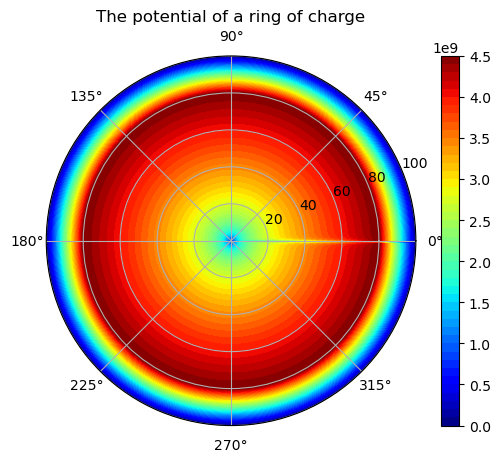

In [49]:
import numpy as np
import matplotlib.pyplot as plt
Q = 0.2
pi = np.pi
ep = 8.85*(10**(-12))
r_ring = 0.8

angle_mesh = 361
radius_mesh = 101

vGrid = np.zeros((radius_mesh, angle_mesh))

r_max = 100
a_max = 360
r = np.linspace(0, r_max, radius_mesh)
t = np.linspace(0, a_max, angle_mesh)

dr = r[1] - r[0]
dt = t[1] - t[0]
 
maxItr = 2000
Itr = 0
tolerance = 0.001
diff=np.empty((angle_mesh,angle_mesh))

while Itr < maxItr and len(diff)>0:
    vTemp = vGrid.copy()
    for i in range(1,radius_mesh-1):
        for j in range(0,angle_mesh-1):
            if r[i] == 80:
                vGrid[i,j] = Q / (2*pi*ep*r_ring)
            else:
                C = (1 / ((1/r[i]*dr) + (2/dr**2) + (2/(r[i]*dt)**2)))
                term1 = (1/r[i])*(vGrid[i+1,j]/dr)
                term2 = (1/dr**2)*(vGrid[i+1,j]+vGrid[i-1,j])
                term3 = (1/(r[i]*dt)**2)*(vGrid[i,j+1]+vGrid[i,j-1])
                vGrid[i,j] = C*(term1 + term2 + term3)
    Itr+=1
    diff = np.where(abs(vTemp-vGrid)>tolerance)
    


colorinterpolation = 50
colourMap = plt.cm.jet

radius_range = np.radians(np.linspace(0, a_max, angle_mesh))
angle_range = np.linspace(0, r_max, radius_mesh)
radius, angle = np.meshgrid(radius_range,angle_range)


fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.set(title = "The potential of a ring of charge")
pt = ax.contourf(radius, angle, vGrid, colorinterpolation, cmap=colourMap)
fig.colorbar(pt)
plt.show()

# سوال اول امتحان

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#state = [theta, omega]
#params = [g,l]

def derivative(state, t, params):
    d_theta = state[1] # omega_i
    d_omega = -1*state[0]*params[0]/params[1] # -(g/l)*theta_i
    return np.array([d_theta, d_omega])

In [12]:
def derivative(state, t, params):
    d_theta = state[1] # omega_i
    d_omega = -1*state[0]*params[0]/params[1] # -(g/l)*theta_i
    return np.array([d_theta, d_omega])
Ti = 0
Tf = 10
dt = 0.04
nSteps = int((Tf-Ti)/dt)


states = np.zeros((nSteps,2))
states[0,:] = [0.03,0] #state = [theta, omega]
params = np.array([10,1]) #params = [g,l]

t2 = np.linspace(0, 10, nSteps)
t = 0 + dt

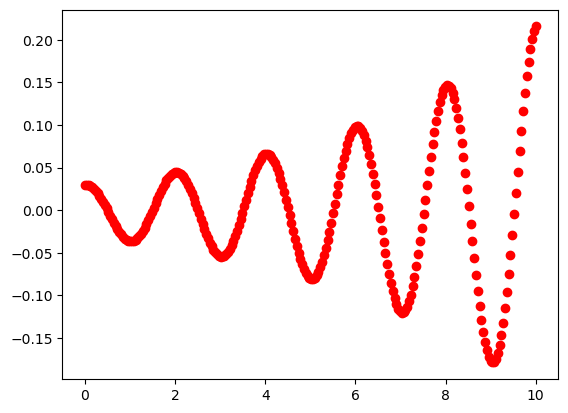

In [13]:
def Euler(state, t, dt, derivative, params):
    derive = derivative(state,t, params)
    derive = derive*dt
    return state+derive

def derivative(state, t, params):
    d_theta = state[1] # omega_i
    d_omega = -1*state[0]*params[0]/params[1] # -(g/l)*theta_i
    return np.array([d_theta, d_omega])
Ti = 0
Tf = 10
dt = 0.04
nSteps = int((Tf-Ti)/dt)


states = np.zeros((nSteps,2))
states[0,:] = [0.03,0] #state = [theta, omega]
params = np.array([10,1]) #params = [g,l]

t2 = np.linspace(0, 10, nSteps)
t= 0 + dt

for i in range(1,nSteps):
    newstateE = Euler(states[i-1,:], t, dt, derivative, params)
    states[i,:] = newstateE

plt.plot(t2, states[:,0], 'ro')
plt.show()

In [14]:
def Euler_Cromer(state, t, dt, derivative, params):
    derive = derivative(state,t, params)
    nextState = [0,0]
    nextState[1] = state[1]+derive[1]*dt
    nextState[0] = state[0]+nextState[1]*dt
    return nextState


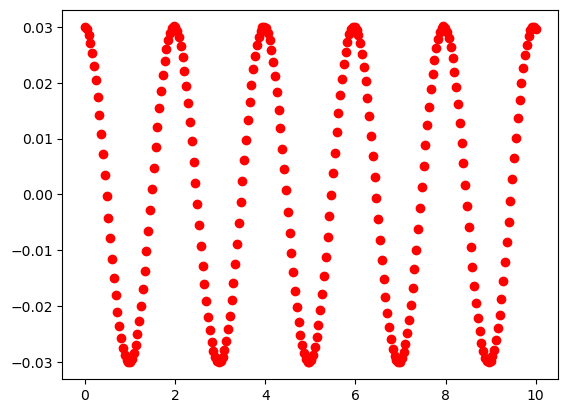

In [15]:
def Euler_Cromer(state, t, dt, derivative, params):
    derive = derivative(state,t, params)
    nextState = [0,0]
    nextState[1] = state[1]+derive[1]*dt
    nextState[0] = state[0]+nextState[1]*dt
    return nextState

def derivative(state, t, params):
    d_theta = state[1] # omega_i
    d_omega = -1*state[0]*params[0]/params[1] # -(g/l)*theta_i
    return np.array([d_theta, d_omega])

Ti = 0
Tf = 10
dt = 0.04
nSteps = int((Tf-Ti)/dt)


states2 = np.zeros((nSteps,2))
states2[0,:] = [0.03,0] #state = [theta, omega]
params = np.array([10,1]) #params = [g,l]

t2 = np.linspace(0, 10, nSteps)
t= 0 + dt

for i in range(1,nSteps):
    newstateEC = Euler_Cromer(states2[i-1,:], t, dt, derivative, params)
    states2[i,:] =newstateEC

plt.plot(t2, states2[:,0], 'ro')
plt.show()

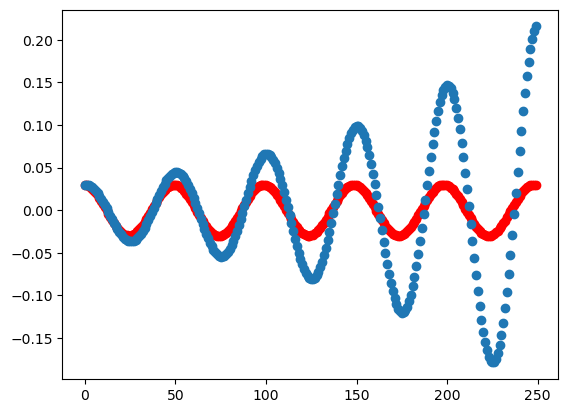

In [16]:
def Euler(state, t, dt, derivative, params):
    derive = derivative(state,t, params)
    derive=derive*dt
    return state+derive
#state = [theta, omega]
#params = [g,l]
def derivative(state, t, params):
    return np.array([state[1], -1*state[0]*params[0]/params[1]])

def Euler_Cromer(state, t, dt, derivative, params):
    derive = derivative(state,t, params)
    nextState = [0,0]
    nextState[1] = state[1]+derive[1]*dt
    nextState[0] = state[0]+nextState[1]*dt
    return nextState

# Pendulum equation
# Approximate sin theta with theta
import numpy as np
import matplotlib.pyplot as plt

Tf = 10
dt = 0.04
nSteps = int(Tf/dt)
states = np.zeros((nSteps,2))
states[0,:] = [0.03,0]
params = np.array([10,1])
states2 = np.zeros((nSteps,2))
states2[0,:] = [0.03,0]
t2 = np.arange(nSteps)
t=1
for i in range(1,len(t2)):
    newstateE = Euler(states[i-1,:], t, dt, derivative, params)
    states[i,:] =newstateE
    newstateEC = Euler_Cromer(states2[i-1,:], t, dt, derivative, params)
    states2[i,:] =newstateEC

plt.plot(t2, states2[:,0], 'ro')
plt.plot(t2, states[:,0], 'o')
plt.show()

# سوال دوم

In [17]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

Integral using sum:  0.97502383217623


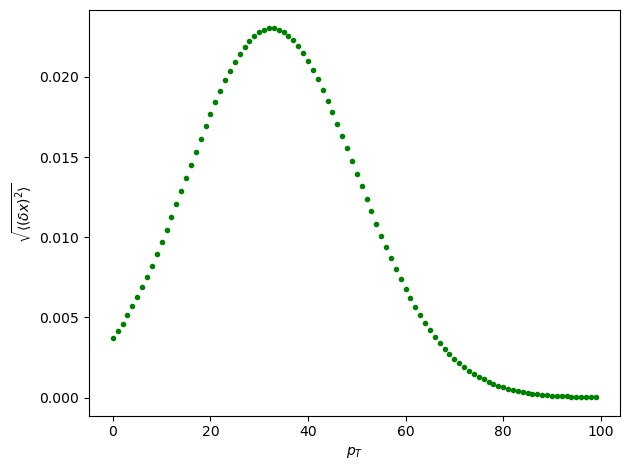

In [18]:
mu=300
loc= -267
x= np.arange(100)
dist=poisson.pmf(x, mu, loc)
print ("Integral using sum: ", np.sum(dist))
plt.plot(x, (dist), 'g.') 
plt.xlabel(r"$p_{T}$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 
plt.tight_layout()
plt.show()

In [48]:
count = 0
mymax=np.max(dist)
print(mymax)
print ("Integral using sum: ", np.sum(dist))

for i in range(100000):
    xi = int(np.random.uniform(0,100))
    yi = np.random.uniform(0,mymax)
    if yi < poisson.pmf(xi, mu, loc) :
        count+=1
    
print("Integral using MC method: ", 100*mymax*float(count)/100000)


0.023026546149191047
Integral using sum:  0.97502383217623
Integral using MC method:  0.9805394146710023


In [20]:
count = 0
count2 = 0 
for i in range(100000):
    xi = int(np.random.uniform(0,100))
    yi = np.random.uniform(0,mymax)
    if poisson.pmf(xi, mu, loc) > yi:
        count+=1
        if xi > 20: 
            count2+=1
print("The probability for p > 20 GeV: ",float(count2)/float(count))

The probability for p > 20 GeV:  0.7834189774799308


Integral using sum:  0.97502383217623
Maximum probability (haight of the rectangle to integrate):  0.023026546149191047
Integral using MC method:  0.9721807784188459
The probability for p > 20 GeV:  0.7813358597820937


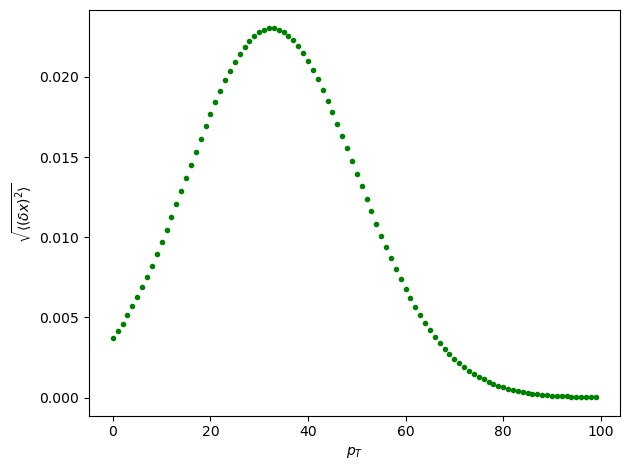

In [21]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
mu=300
loc= -267
x= np.arange(100)
dist=poisson.pmf(x, mu, loc)
print ("Integral using sum: ", np.sum(dist))
mymax=np.max(dist)
print ("Maximum probability (haight of the rectangle to integrate): ", mymax)
count = 0
count2 = 0 
for i in range(100000):
    xi = int(np.random.uniform(0,100))
    yi = np.random.uniform(0,mymax)
    if poisson.pmf(xi, mu, loc) > yi:
        count+=1
        if xi > 20: 
            count2+=1
print("Integral using MC method: ", 100*mymax*float(count)/100000)
print("The probability for p > 20 GeV: ",float(count2)/float(count))

plt.plot(x, (dist), 'g.') 
plt.xlabel(r"$p_{T}$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 
plt.tight_layout()
plt.show()

# سوال سوم

In [26]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def OneDWRandomStep(n_stories, t_max):
    t = np.arange(t_max)
    steps = 2* (np.random.rand(n_stories, t_max)) - 1
    positions=np.cumsum(steps,axis=1)
    return positions

In [30]:
n_stories = 1000
t_max = 200
myRW = OneDWRandomStep(n_stories,t_max)
myMean = np.mean(myRW[:,-1])
print(myMean)
sq_distanceRnd = myRW**2
mean_sq_distanceRnd = np.mean(sq_distanceRnd, axis=0)
print(mean_sq_distanceRnd[-1])

0.13890585628464558
66.53096632145602


-0.3535382473981791
62.41292158381812


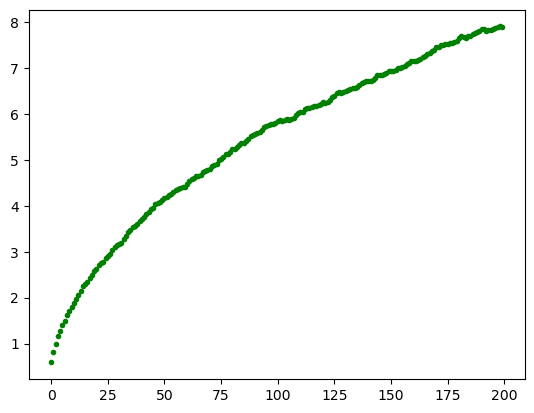

In [41]:
n_stories = 1000
t_max = 200
myRW = OneDWRandomStep(n_stories,t_max)
myMean = np.mean(myRW[:,-1])
print(myMean)
sq_distanceRnd = myRW**2
mean_sq_distanceRnd = np.mean(sq_distanceRnd, axis=0)
print(mean_sq_distanceRnd[-1])

t = np.arange(t_max)
plt.plot(t, np.sqrt(mean_sq_distanceRnd), 'g.') 
plt.show()


In [33]:
def power ( x , a , b ) :
    return a *x **b

In [37]:
popt, pcov = curve_fit ( power , t , np.sqrt(mean_sq_distanceRnd))
print(popt)

[0.59834225 0.49164483]


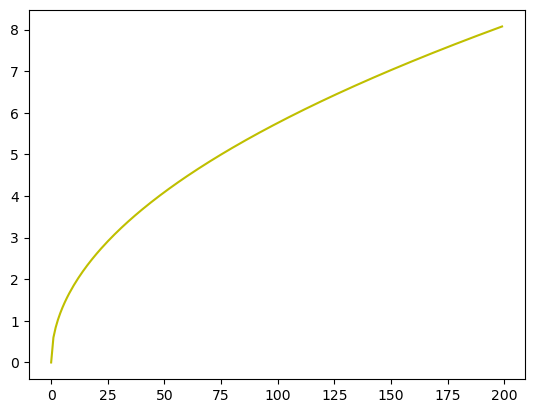

In [38]:
plt.plot(t, power ( t , popt[0] , popt[1]), 'y-') 
plt.show()

-0.08393548534335339


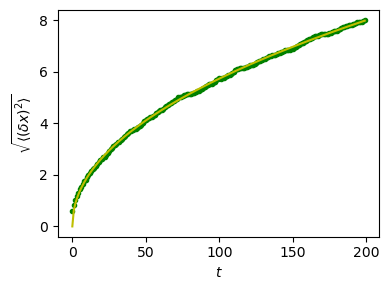

0.6270960610609089 ,  0.4807728508351319


In [39]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
def OneDWRandomStep(n_stories, t_max):
    t = np.arange(t_max)
    steps = 2* (np.random.rand(n_stories, t_max)) - 1
    positions=np.cumsum(steps,axis=1)
    return positions
def power ( x , a , b ) :
    return a *x **b

from scipy.optimize import curve_fit
n_stories = 1000
t_max = 200
myRW = OneDWRandomStep(n_stories,t_max)
myMean = np.mean(myRW[:,-1])
print(myMean)
sq_distanceRnd = myRW**2
mean_sq_distanceRnd = np.mean(sq_distanceRnd, axis=0)
t = np.arange(t_max)
popt, pcov = curve_fit ( power , t , np.sqrt(mean_sq_distanceRnd))
plt.figure(figsize=(4, 3)) 
plt.plot(t, np.sqrt(mean_sq_distanceRnd), 'g.', t, power ( t , popt[0] , popt[1]), 'y-') 
plt.xlabel(r"$t$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 
plt.tight_layout()
plt.show()
print(popt[0] ,", ", popt[1])